In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import median_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [4]:
rides = pd.read_csv("rides_weather_hoildays_all_ops.csv")
rides.head()

,Unnamed: 0,date,year,month,day,month_year,dow,year.1,weekend_flag,yesterday,...,Labor Day,Columbus Day,Veterans Day,Thanksgiving Day,Christmas Day,Christmas Eve,New Years Eve,PRCP,TMAX,TMIN
0,0,2014-01-21,2014,1,21,12014,2,2014,False,2014-01-20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,49.0
1,1,2014-01-22,2014,1,22,12014,3,2014,False,2014-01-21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,48.0
2,2,2014-01-23,2014,1,23,12014,4,2014,False,2014-01-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,48.0
3,3,2014-01-24,2014,1,24,12014,5,2014,False,2014-01-23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,49.0
4,4,2014-01-25,2014,1,25,12014,6,2014,True,2014-01-24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,50.0


In [69]:
split = int(.7*len(rides))

train_data = rides.iloc[0:split, :]
test_data = rides.iloc[split:, :]

features = ['month', 'day', 'dow', 'year', 'season', 'weekend_flag', 
            'yesterday_swipes', 'year_ago_swipes', 'weekday_avg_month_prior', 
            'weekend_avg_month_prior', 'Holiday', 'New Year Day',
           'Martin Luther King Jr. Day', 'Presidents Day (Washingtons Birthday)',
           'Memorial Day', 'Independence Day', 'Labor Day', 'Columbus Day',
           'Veterans Day', 'Thanksgiving Day', 'Christmas Day', 'Christmas Eve',
           'New Years Eve', 'PRCP', 'TMAX', 'TMIN']

X = rides[features]
y = rides['swipes']

X_train = train_data[features]
X_test = test_data[features] 
y_train = train_data['swipes']
y_test = test_data['swipes']

In [56]:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
from sklearn.model_selection import RandomizedSearchCV


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [57]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [58]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [59]:
rf_random.score(X_test, y_test)

0.9642264524630522

In [60]:
# Use the forest's predict method on the test data
predictions = rf_random.predict(X_test)
# Calculate the absolute errors
abs_errors = abs(predictions - y_test)
sq_errors = (predictions - y_test)**2
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(abs_errors), 4))
print('RMSE :', round(np.sqrt(np.mean(sq_errors)), 4))

Mean Absolute Error: 28538.2067
RMSE : 41402.766


In [61]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test, predictions)

18059.829999999987

In [62]:
from sklearn.metrics import explained_variance_score
# Best possible score is 1.0, lower values are worse.
explained_variance_score(y_test, predictions)

0.9656978314416473

In [63]:
abs_errors_percent = abs((predictions - y_test)/y_test)
print("This model's predictions is on average about ", round(np.mean(abs_errors_percent), 4), "off of the actual ridership for that day")


This model's predictions is on average about  0.0478 off of the actual ridership for that day


In [68]:
rf_rides = RandomForestRegressor(n_estimators=800,
 min_samples_split=2,
 min_samples_leaf=1,
 max_features='auto',
 max_depth=100,
 bootstrap=True).fit(X_train, y_train)

feature_importances_all = pd.DataFrame(rf_rides.feature_importances_,
                                     index = X_train.columns, 
                                     columns=['importance']).sort_values('importance', ascending=False)
feature_importances_all

,importance
weekend_flag,0.634837
yesterday_swipes,0.251230
Holiday,0.049064
dow,0.012626
year,0.011035
year_ago_swipes,0.009386
weekday_avg_month_prior,0.004545
month,0.004307
Thanksgiving Day,0.003669
PRCP,0.002728


In [65]:
errors_percent = (predictions - y_test)/y_test
test_errors = X_test
test_errors['actual'] = y_test
test_errors['predicted'] = predictions
test_errors['errors_percents'] = errors_percent
test_errors.sort_values('errors_percents')[['month', 'day', 'year', 'errors_percents', 'actual', 'predicted']]

,month,day,year,errors_percents,actual,predicted
1756,11,12,2018,-0.343317,506591,332669.73000
1721,10,8,2018,-0.235513,664139,507725.51000
1757,11,13,2018,-0.233014,831737,637930.63125
1802,12,28,2018,-0.205003,523107,415868.33125
1438,12,29,2017,-0.159770,501799,421626.75500
1449,1,9,2018,-0.154461,755471,638780.08625
1687,9,4,2018,-0.136756,740397,639143.24375
1679,8,27,2018,-0.130524,714778,621482.00250
1615,6,24,2018,-0.121221,391022,343621.79875
1693,9,10,2018,-0.117621,740523,653422.09375


Text(0.5, 1.0, 'Test Set Error Percentage')

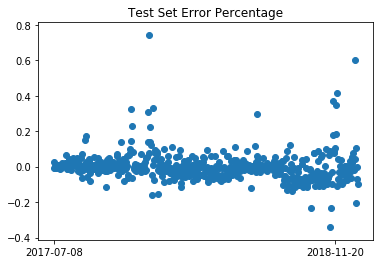

In [66]:
from matplotlib.pyplot import scatter, title
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
scatter(test_data['date'], errors_percent)
ax.set_xticks(ax.get_xticks()[::500])
title("Test Set Error Percentage")

In [75]:
# compare to base model

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} swipes.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Average Error: 29654.0325 swipes.
Accuracy = 95.08%.


In [76]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random,  X_test, y_test)

Model Performance
Average Error: 28538.2067 swipes.
Accuracy = 95.22%.


In [77]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.14%.
